KeyError: 'Result'

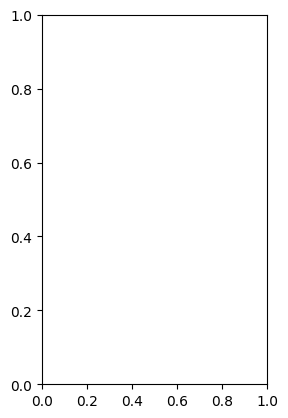

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import docx
from docx import Document
import csv
import io
from docx.shared import Inches
from docx.enum.section import WD_SECTION
from docx.enum.text import WD_PARAGRAPH_ALIGNMENT
from docx.shared import Pt, RGBColor
import numpy as np
import datetime
from docx.oxml.ns import nsdecls
from docx.oxml import parse_xml
from docx.shared import RGBColor
from docx.oxml.ns import nsdecls
from docx.oxml import parse_xml
G = "earthpit.csv"
ef = pd.read_csv(G)

#bar graph
plt.subplot(122)
result_counts = ef.groupby(["Result", "Remark"])["Location"].count().unstack().fillna(0)
colors = ["#b967ff", "#e0a899", "#fffb96", "#428bca"]  # Add more colors if needed

result_remark = result_counts.index
location_count = result_counts.values

x = np.arange(len(result_remark))
width = 0.4

plt.bar(x, location_count, width, color=colors)
plt.xlabel("Result and Remark")
plt.ylabel("Location Count")
plt.title("Earth Pit Electrode Test Results (Bar Graph)")
plt.xticks(x, result_remark)
plt.legend(result_counts.columns)

# Add labels to each bar
for i, count in enumerate(location_count):
        plt.text(x[i], count, str(int(count)), ha='center', va='bottom')

plt.tight_layout()
plt.show()
    


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import docx
from docx import Document
import csv
import io
from docx.shared import Inches
from docx.enum.section import WD_SECTION
from docx.enum.text import WD_PARAGRAPH_ALIGNMENT
from docx.shared import Pt, RGBColor
import numpy as np
import datetime
from docx.oxml.ns import nsdecls
from docx.oxml import parse_xml
from docx.shared import RGBColor
from docx.oxml.ns import nsdecls
from docx.oxml import parse_xml

G = "earthpit.csv"
ef = pd.read_csv(G)

def Earth_result(Elec_DistRatio, Mea_EarthResist):
    if Mea_EarthResist <= 2 and Elec_DistRatio >= 1:
        return "PASS - Test Electrodes are properly placed"
    elif Mea_EarthResist <= 2 and Elec_DistRatio < 1:
        return "PASS - Test Electrodes are not properly placed"
    elif Mea_EarthResist > 2 and Elec_DistRatio >= 1:
        return "FAIL - Test Electrodes are properly placed"
    elif Mea_EarthResist > 2 and Elec_DistRatio < 1:
        return "FAIL - Test Electrodes are not properly placed"
    else:
        return "Invalid"
    
def earthpit_result(Elec_DistRatio, Mea_EarthResist):                                                      #earth residual test condition
    if Mea_EarthResist <= 2 and Elec_DistRatio >= 1:
        return "PASS"
    elif Mea_EarthResist <= 2 and Elec_DistRatio < 1:
        return "PASS"
    elif Mea_EarthResist > 2 and Elec_DistRatio >= 1:
        return "FAIL"
    elif Mea_EarthResist > 2 and Elec_DistRatio < 1:
        return "FAIL"
    else:
        return "Invalid"
    
def earth_remark_result(Elec_DistRatio, Mea_EarthResist):                                                      #earth residual test condition
    if Mea_EarthResist <= 2 and Elec_DistRatio >= 1:
        return "Test Electrodes are properly placed"
    elif Mea_EarthResist <= 2 and Elec_DistRatio < 1:
        return "Test Electrodes are not properly placed"
    elif Mea_EarthResist > 2 and Elec_DistRatio >= 1:
        return "Test Electrodes are properly placed"
    elif Mea_EarthResist > 2 and Elec_DistRatio < 1:
        return "Test Electrodes are not properly placed"
    else:
        return "Invalid"
    

def earthpit_table(ef, doc):                                                                      #creates the earthpit table with  result coloumn
    ef["Electrode Distance Ratio"] = round(
        ef["Nearest Electrode Distance"] / ef["Earth Electrode Depth"], 2
    )
    ef["Calculated Earth Resistance - Individual (Ω)"] = (
        ef["Measured Earth Resistance - Individual"] * ef["No. of Parallel Electrodes"]
    )

    ef["Remark"] = ef.apply(
        lambda row: earth_remark_result(
            row["Electrode Distance Ratio"], row["Measured Earth Resistance - Individual"]
        ),
        axis=1,
    )
    ef["Result"] = ef.apply(
        lambda row: earthpit_result(
            row["Electrode Distance Ratio"], row["Measured Earth Resistance - Individual"]
        ),
        axis=1,
    )

    table_data = ef.iloc[:, 0:]
    num_rows, num_cols = table_data.shape[0], table_data.shape[1]
    table = doc.add_table(rows=num_rows + 1, cols=num_cols)
    num_rows, num_cols = table_data.shape
    table.style = "Table Grid"
    table.alignment = WD_PARAGRAPH_ALIGNMENT.LEFT
    table.autofit = False

    column_widths = {
        0: 0.25,
        1: 0.6,
        2: 0.7,
        3: 0.5,
        4: 0.6,
        5: 0.56,
        6: 0.55,
        7: 0.55,
        8: 0.6,
        9: 0.6,
        10: 0.6,
        11: 0.7,
        12: 0.5
    }

    for j, col in enumerate(table_data.columns):
        table.cell(0, j).text = col
        table.cell(0, j).width = Inches(column_widths.get(j, 1))
        table.cell(0, j).paragraphs[0].alignment = WD_PARAGRAPH_ALIGNMENT.CENTER

    for j, col in enumerate(table_data.columns):
        table.cell(0, j).text = col
        table.cell(0, j).width = Inches(column_widths[j])
        table.cell(0, j).paragraphs[0].alignment = WD_PARAGRAPH_ALIGNMENT.CENTER
        first_row_cells = table.rows[0].cells
        for cell in first_row_cells:
            cell.paragraphs[0].alignment = WD_PARAGRAPH_ALIGNMENT.CENTER
            cell_elem = cell._element
            tc_pr = cell_elem.get_or_add_tcPr()
            shading_elem = parse_xml(f'<w:shd {nsdecls("w")} w:fill="d9ead3"/>')
            tc_pr.append(shading_elem)

    for i, row in enumerate(table_data.itertuples(), start=1):
        for j, value in enumerate(row[1:], start=0):
            cell = table.cell(i, j)
            cell.text = str(value)
            cell.paragraphs[0].alignment = WD_PARAGRAPH_ALIGNMENT.CENTER
            if j == num_cols - 1:  # Apply background color only to the Result column
                result_cell = cell
                if value.startswith("PASS"):
                    shading_elm = parse_xml(
                        r'<w:shd {} w:fill="#5ac85a"/>'.format(nsdecls("w"))
                    )  # Green color
                    result_cell._tc.get_or_add_tcPr().append(shading_elm)
                elif value.startswith("FAIL"):
                    shading_elm = parse_xml(
                        r'<w:shd {} w:fill="#dc0000"/>'.format(nsdecls("w"))
                    )  # Red color
                    result_cell._tc.get_or_add_tcPr().append(shading_elm)
    for section in doc.sections:
        section.left_margin = Inches(0.2)

    font_size = 7
    for row in table.rows:
        for cell in row.cells:
            for paragraph in cell.paragraphs:
                for run in paragraph.runs:
                    run.alignment = WD_PARAGRAPH_ALIGNMENT.CENTER
                    run.font.size = Pt(font_size)
                    run.font.name = "Calibri"

    return doc

def Earth_combined_graph(ef):
    plt.figure(figsize=(16, 8))

    # Bar graph
    plt.subplot(121)
    x = ef["Location"]
    y = ef["Measured Earth Resistance - Individual"]
    colors = ["#b967ff", "#e0a899", "#fffb96", "#428bca"]  # Add more colors if needed
    plt.bar(x, y, color=colors)
    plt.xlabel("Location")
    plt.ylabel("Measured Earth Resistance - Individual")
    plt.title("Location VS Measured Earth Resistance - Individual graph")

    # Bar graph - Result and Remark
    plt.subplot(122)
    result_counts = ef.groupby(["Result", "Remark"])["Location"].count().unstack().fillna(0)
    x = np.arange(result_counts.shape[1])
    width = 0.2
    colors = ["#b967ff", "#e0a899", "#fffb96", "#428bca"]  # Add more colors if needed
    for i, column in enumerate(result_counts.columns):
        plt.bar(x + i * width, result_counts[column], width, label=column, color=colors[i])

    plt.xlabel("Result and Remark")
    plt.ylabel("Location")
    plt.title("Earth Pit Electrode Test Results (Bar Graph)")
    plt.xticks(x + width / 2, result_counts.index)
    plt.yticks(np.arange(len(ef["Location"].unique())), ef["Location"].unique())
    plt.legend()

    plt.tight_layout()
    graph_combined = io.BytesIO()
    plt.savefig(graph_combined)
    plt.close()

    return graph_combined









def main():
    G = "earthpit.csv"
    ef = pd.read_csv(G)
    doc = Document()
    doc.add_heading("Earth Pit Electrode Test", 0)
    doc = earthpit_table(ef, doc)
    graph_combined1 = Earth_combined_graph(ef)
    doc.add_picture(graph_combined1, width=Inches(8), height=Inches(4)) 
    doc.save("Earth_Pit1.docx")

main()
